In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("/kaggle/input/data-storm-5-0/train_kaggle.csv")
train_df.head()

/tmp/ipykernel_33/3841849681.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("/kaggle/input/data-storm-5-0/train_kaggle.csv")


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [3]:
init_len = len(train_df)

In [4]:
train_df.dtypes

Customer_ID         float64
outlet_city          object
luxury_sales         object
fresh_sales          object
dry_sales            object
cluster_catgeory     object
dtype: object

In [5]:
total_nan = train_df.isna().sum().sum()
print(f"Total number of NaN values in the DataFrame: {total_nan}")

Total number of NaN values in the DataFrame: 111


In [6]:
# Calculate the number of rows with at least one NaN value
num_rows_with_nan = train_df.isna().any(axis=1).sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(train_df)

# Calculate the percentage of rows with at least one NaN value
percentage_rows_with_nan = (num_rows_with_nan / total_rows) * 100

print(f"Number of rows with at least one NaN value: {num_rows_with_nan}")
print(f"Percentage of rows with at least one NaN value: {percentage_rows_with_nan}%")

Number of rows with at least one NaN value: 94
Percentage of rows with at least one NaN value: 0.012142271250589353%


In [7]:
train_df.dropna(subset=['luxury_sales'], inplace=True)
numeric_column = pd.to_numeric(train_df['luxury_sales'], errors='coerce')
non_float_items = train_df[pd.isna(numeric_column)]

non_float_items

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
80043,10774052.0,Kelaniya,One thousand four hundread ruppes,1118.0,5934.0,4
175278,10347733.0,Peliyagoda,nul,4286.28,nul,2
296621,10215937.0,Panadura,nul,8155.11,nul,2
297911,10189925.0,Kelaniya,Eight hundread ruppess,4003.84,1059.84,2
326593,10467590.0,Nuwara Eliya,six hundread and hirty,3420.3,894.54,2
367935,10445384.0,Galle,nul,1919.13,7563.63,2
497177,10537755.0,Kandy,Thousand tow hundread,2041.0,6939.4,1
497245,10468127.0,Kandy,seven hundread and nine ruppees,1032.48,4194.45,1
558562,10076064.0,Trincomalee,Three thousand two hundread ruppess,10416.9,1923.12,6.0
753131,10695296.0,Batticaloa,Four thousand one hundread ruppess,4286.72,4034.56,3


In [8]:
train_df.loc[80043, 'luxury_sales'] = 1400
train_df.loc[297911, 'luxury_sales'] = 800
train_df.loc[326593, 'luxury_sales'] = 630
train_df.loc[497177, 'luxury_sales'] = 1200
train_df.loc[497245, 'luxury_sales'] = 709
train_df.loc[558562, 'luxury_sales'] = 3200
train_df.loc[753131, 'luxury_sales'] = 4100
train_df.drop(175278, inplace=True)
train_df.drop(296621, inplace=True)
train_df.drop(367935, inplace=True)

train_df['luxury_sales'] = pd.to_numeric(train_df['luxury_sales'], errors='coerce')

In [9]:
train_df.dropna(subset=['fresh_sales'], inplace=True)
numeric_column = pd.to_numeric(train_df['fresh_sales'], errors='coerce')
non_float_items = train_df[pd.isna(numeric_column)]

train_df.loc[161810, 'fresh_sales'] = 605
train_df.loc[326334, 'fresh_sales'] = 3500
train_df.loc[558897, 'fresh_sales'] = 13000
train_df.loc[752816, 'fresh_sales'] = 5000
train_df.loc[753256, 'fresh_sales'] = 2700
train_df.drop(174714, inplace=True)
train_df.drop(268571, inplace=True)
train_df.drop(327495, inplace=True)
train_df.drop(327505, inplace=True)

train_df['fresh_sales'] = pd.to_numeric(train_df['fresh_sales'], errors='coerce')

In [10]:
train_df.dropna(subset=['dry_sales'], inplace=True)
numeric_column = pd.to_numeric(train_df['dry_sales'], errors='coerce')
non_float_items = train_df[pd.isna(numeric_column)]

train_df.loc[148029, 'dry_sales'] = 4200
train_df.drop(174631, inplace=True)
train_df.drop(174720, inplace=True)

train_df['dry_sales'] = pd.to_numeric(train_df['dry_sales'], errors='coerce')

In [11]:
train_df.dropna(subset=['cluster_catgeory'], inplace=True)
numeric_column = pd.to_numeric(train_df['cluster_catgeory'], errors='coerce')
non_float_items = train_df[pd.isna(numeric_column)]

train_df.loc[3560, 'cluster_catgeory'] = 6
train_df['cluster_catgeory'] = train_df['cluster_catgeory'].astype(int)
valid_values = [1, 2, 3, 4, 5, 6]
train_df = train_df[train_df['cluster_catgeory'].isin(valid_values)]

In [12]:
train_df.dropna(subset=['outlet_city'], inplace=True)
train_df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [13]:
train_df.dtypes

Customer_ID         float64
outlet_city          object
luxury_sales        float64
fresh_sales         float64
dry_sales           float64
cluster_catgeory      int64
dtype: object

In [14]:
# Check for duplicate rows
num_duplicate_rows = train_df.duplicated().sum()

print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 0


In [15]:
fin_len = len(train_df)
print(init_len)
print((init_len-fin_len))
print(((init_len-fin_len)/init_len)*100)

774155
106
0.013692348431515653


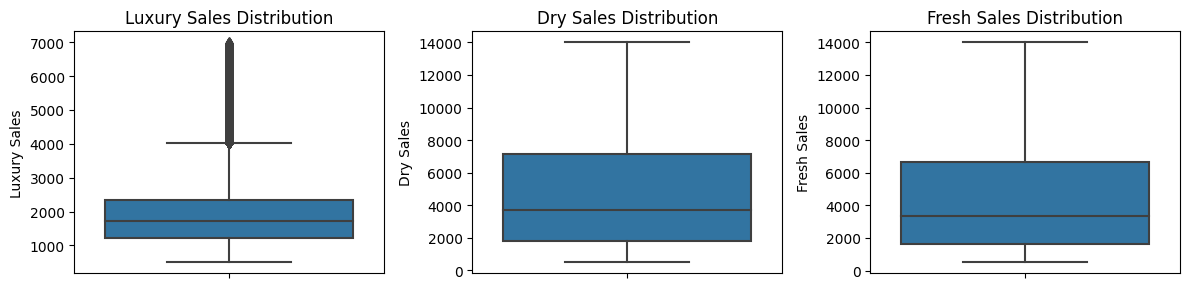

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))  # 3 rows, 1 column

# Plot boxplots for luxury_sales, dry_sales, and fresh_sales
sns.boxplot(y='luxury_sales', data=train_df, ax=axes[0])
axes[0].set_title('Luxury Sales Distribution')
axes[0].set_ylabel('Luxury Sales')

sns.boxplot(y='dry_sales', data=train_df, ax=axes[1])
axes[1].set_title('Dry Sales Distribution')
axes[1].set_ylabel('Dry Sales')

sns.boxplot(y='fresh_sales', data=train_df, ax=axes[2])
axes[2].set_title('Fresh Sales Distribution')
axes[2].set_ylabel('Fresh Sales')

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig('/kaggle/working/box_plot_of_sales.eps', format='eps')

# Display the plots
plt.show()

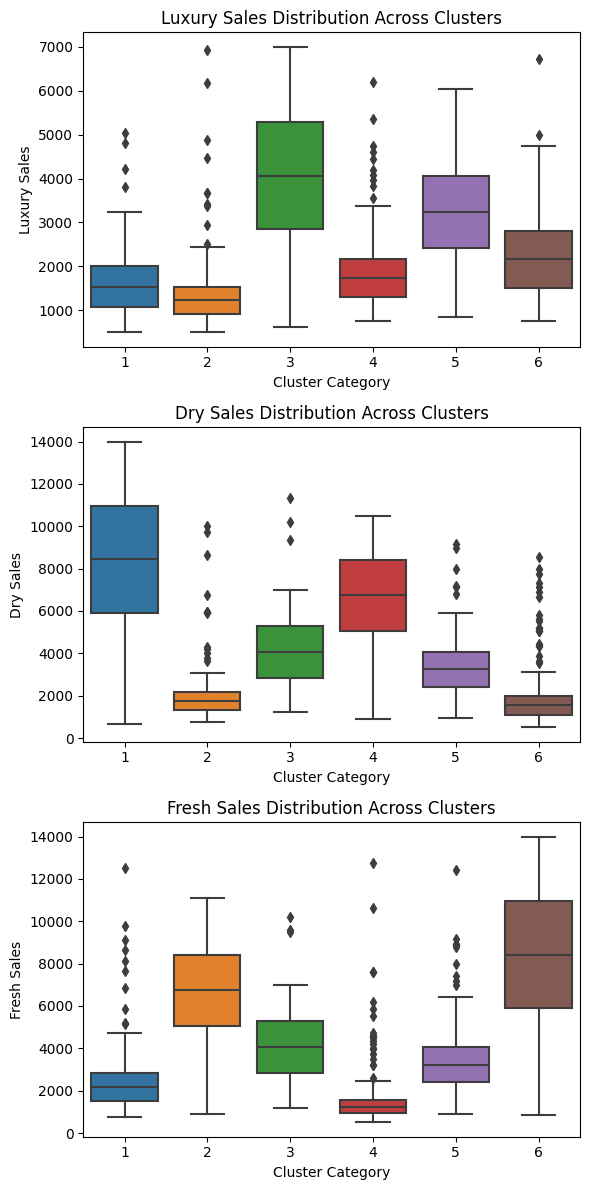

In [19]:
fig, axes = plt.subplots(3, 1, figsize=(6, 12))  # 3 rows, 1 column

# Plot boxplots for luxury_sales, dry_sales, and fresh_sales
sns.boxplot(x='cluster_catgeory', y='luxury_sales', data=train_df, ax=axes[0])
axes[0].set_title('Luxury Sales Distribution Across Clusters')
axes[0].set_xlabel('Cluster Category')
axes[0].set_ylabel('Luxury Sales')

sns.boxplot(x='cluster_catgeory', y='dry_sales', data=train_df, ax=axes[1])
axes[1].set_title('Dry Sales Distribution Across Clusters')
axes[1].set_xlabel('Cluster Category')
axes[1].set_ylabel('Dry Sales')

sns.boxplot(x='cluster_catgeory', y='fresh_sales', data=train_df, ax=axes[2])
axes[2].set_title('Fresh Sales Distribution Across Clusters')
axes[2].set_xlabel('Cluster Category')
axes[2].set_ylabel('Fresh Sales')

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig('/kaggle/working/box_plot_of_clusters.eps', format='eps')

# Display the plots
plt.show()

In [20]:
num_items = train_df[(train_df['luxury_sales'] > 3500)&(train_df['cluster_catgeory']==1)]
cols_to_drop = num_items.index
train_df = train_df.drop(cols_to_drop)

num_items = train_df[(train_df['fresh_sales'] > 5000)&(train_df['cluster_catgeory']==1)]
cols_to_drop = num_items.index
train_df = train_df.drop(cols_to_drop)

In [21]:
num_items = train_df[(train_df['luxury_sales'] > 2500)&(train_df['cluster_catgeory']==2)]
cols_to_drop = num_items.index
train_df = train_df.drop(cols_to_drop)

num_items = train_df[(train_df['dry_sales'] > 3000)&(train_df['cluster_catgeory']==2)]
cols_to_drop = num_items.index
train_df = train_df.drop(cols_to_drop)

In [22]:
num_items = train_df[(train_df['fresh_sales'] > 8000)&(train_df['cluster_catgeory']==3)]
cols_to_drop = num_items.index
train_df = train_df.drop(cols_to_drop)

num_items = train_df[(train_df['dry_sales'] > 8000)&(train_df['cluster_catgeory']==3)]
cols_to_drop = num_items.index
train_df = train_df.drop(cols_to_drop)

In [23]:
num_items = train_df[(train_df['luxury_sales'] > 3000)&(train_df['cluster_catgeory']==4)]
cols_to_drop = num_items.index
train_df = train_df.drop(cols_to_drop)

num_items = train_df[(train_df['fresh_sales'] > 2500)&(train_df['cluster_catgeory']==4)]
cols_to_drop = num_items.index
train_df = train_df.drop(cols_to_drop)

In [24]:
num_items = train_df[(train_df['fresh_sales'] > 6500)&(train_df['cluster_catgeory']==5)]
cols_to_drop = num_items.index
train_df = train_df.drop(cols_to_drop)

num_items = train_df[(train_df['dry_sales'] > 6000)&(train_df['cluster_catgeory']==5)]
cols_to_drop = num_items.index
train_df = train_df.drop(cols_to_drop)

In [25]:
num_items = train_df[(train_df['luxury_sales'] > 4500)&(train_df['cluster_catgeory']==6)]
cols_to_drop = num_items.index
train_df = train_df.drop(cols_to_drop)

num_items = train_df[(train_df['dry_sales'] > 3000)&(train_df['cluster_catgeory']==6)]
cols_to_drop = num_items.index
train_df = train_df.drop(cols_to_drop)

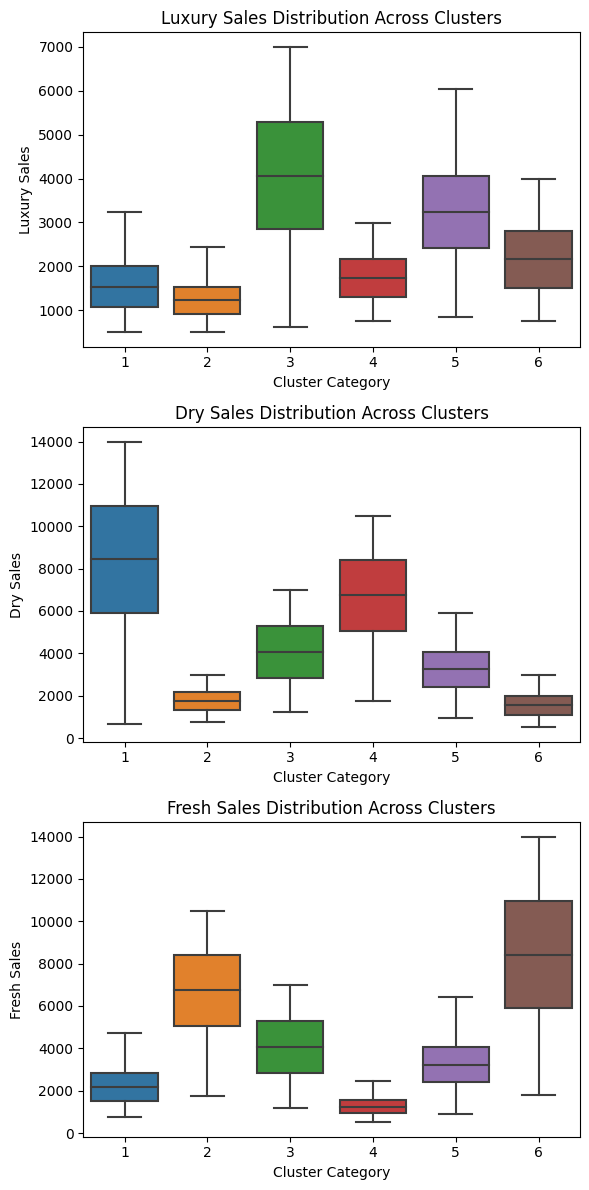

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(6, 12))  # 3 rows, 1 column

# Plot boxplots for luxury_sales, dry_sales, and fresh_sales
sns.boxplot(x='cluster_catgeory', y='luxury_sales', data=train_df, ax=axes[0])
axes[0].set_title('Luxury Sales Distribution Across Clusters')
axes[0].set_xlabel('Cluster Category')
axes[0].set_ylabel('Luxury Sales')

sns.boxplot(x='cluster_catgeory', y='dry_sales', data=train_df, ax=axes[1])
axes[1].set_title('Dry Sales Distribution Across Clusters')
axes[1].set_xlabel('Cluster Category')
axes[1].set_ylabel('Dry Sales')

sns.boxplot(x='cluster_catgeory', y='fresh_sales', data=train_df, ax=axes[2])
axes[2].set_title('Fresh Sales Distribution Across Clusters')
axes[2].set_xlabel('Cluster Category')
axes[2].set_ylabel('Fresh Sales')

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig('/kaggle/working/box_plot_of_clusters_no_outliers.eps', format='eps')

# Display the plots
plt.show()

In [27]:
fin_len = len(train_df)
print(init_len)
print((init_len-fin_len))
print(((init_len-fin_len)/init_len)*100)

774155
195
0.02518875419005238
